<b>Import all packages<b>

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('data.csv')

In [3]:
data.head()

,Position,Track Name,Artist,Streams,URL,Date,Region
0,1,Reggaetón Lento (Bailemos),CNCO,19272,https://open.spotify.com/track/3AEZUABDXNtecAO...,2017-01-01,ec
1,2,Chantaje,Shakira,19270,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,2017-01-01,ec
2,3,Otra Vez (feat. J Balvin),Zion & Lennox,15761,https://open.spotify.com/track/3QwBODjSEzelZyV...,2017-01-01,ec
3,4,Vente Pa' Ca,Ricky Martin,14954,https://open.spotify.com/track/7DM4BPaS7uofFul...,2017-01-01,ec
4,5,Safari,J Balvin,14269,https://open.spotify.com/track/6rQSrBHf7HlZjtc...,2017-01-01,ec


In [4]:
data['Region'].unique()

array(['ec', 'fr', 'ar', 'fi', 'no', 'it', 'lt', 'ph', 'tw', 'nz', 'ee',
       'tr', 'us', 'sv', 'cr', 'de', 'cl', 'jp', 'br', 'hn', 'gt', 'ch',
       'hu', 'ca', 'pe', 'be', 'my', 'dk', 'bo', 'pl', 'at', 'pt', 'se',
       'mx', 'pa', 'uy', 'is', 'es', 'cz', 'ie', 'nl', 'sk', 'co', 'sg',
       'id', 'do', 'lu', 'gb', 'global', 'py', 'au', 'lv', 'gr', 'hk'], dtype=object)

<b>Shakira has higher ratings in Spain than ecuador because she is a Latina artist 

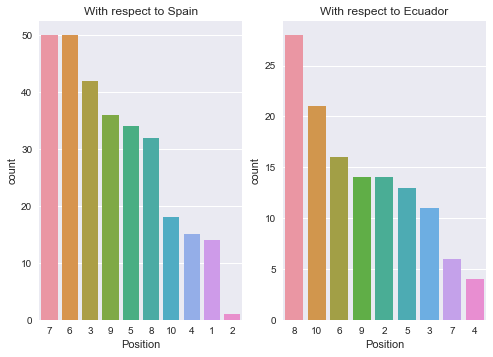

In [5]:
dt_artist = data.loc[data['Artist'] == 'Shakira',:]
dt_loction = dt_artist.loc[dt_artist['Region'] == 'es',:]
da = dt_artist.loc[dt_artist['Region'] == 'ec',:]
fig, ax =plt.subplots(1,2)
dt_l = dt_loction.loc[dt_loction['Position'] < 11,:]
dt_r = da.loc[da['Position'] < 11,:]
sns.countplot(x = 'Position',
              data = dt_l,
              order = dt_l['Position'].value_counts().index,ax=ax[0])
sns.countplot(x = 'Position',
              data = dt_r,
              order = dt_r['Position'].value_counts().index,ax=ax[1])
ax[0].set_title('With respect to Spain')
ax[1].set_title('With respect to Ecuador')

plt.show()

<b> Most Streamed track is Despacito with about 3 million streams

In [6]:
Top_song = data.loc[data['Streams'] == data['Streams'].max() ,:]
Top_song

,Position,Track Name,Artist,Streams,URL,Date,Region
3145443,1,Despacito (Featuring Daddy Yankee),Luis Fonsi,11381520,https://open.spotify.com/track/4aWmUDTfIPGksMN...,2017-05-27,global


<b> Top rated artist is Luis Fonsi with his Hit song Despacito followed by Ed Sheeran for his Single Hit Shape of you**

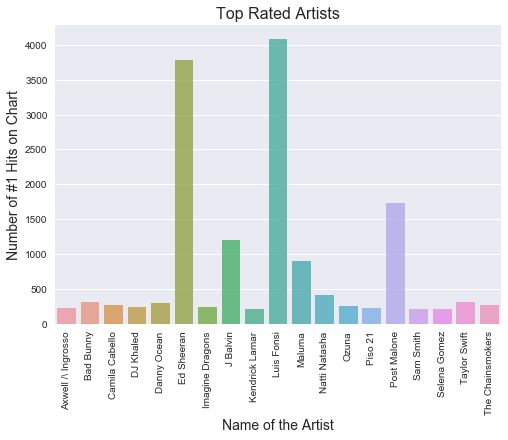

In [7]:
Top = data.loc[data['Position'] == 1,:]
Best = Top.groupby('Artist').size()
Best = Best[(Best.values>200)]
sns.barplot(Best.index, Best.values, alpha=0.8)
plt.xticks(rotation='vertical')
plt.xlabel('Name of the Artist', fontsize=14)
plt.ylabel('Number of #1 Hits on Chart', fontsize=14)
plt.title("Top Rated Artists", fontsize=16)
plt.show()

<b> Let us now check Positions #2 and #3 on the billboard 

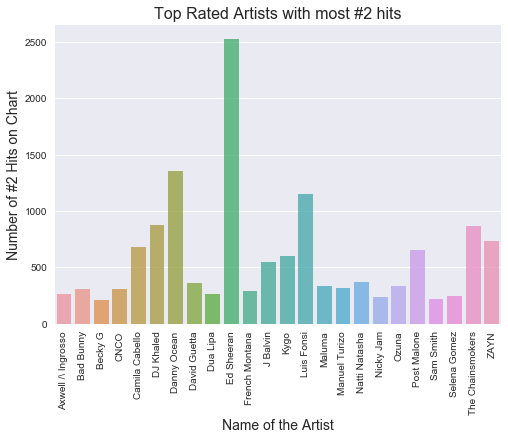

In [8]:
#POSITION - 2
Top = data.loc[data['Position'] == 2,:]
Best = Top.groupby('Artist').size()
Best = Best[(Best.values>200)]
sns.barplot(Best.index, Best.values, alpha=0.8 )
plt.xticks(rotation='vertical')
plt.xlabel('Name of the Artist', fontsize=14)
plt.ylabel('Number of #2 Hits on Chart', fontsize=14)
plt.title("Top Rated Artists with most #2 hits", fontsize=16)
plt.show()

<b>Now for position #3

<b> Though Luis Fonsi leads in number of #1 hits, Ed Sheeran has more hits in the top 3 <b>


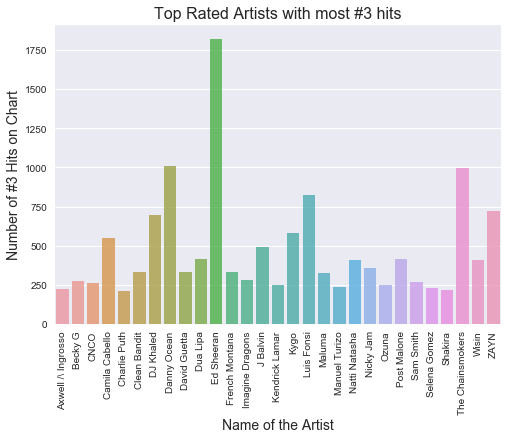

In [9]:
#POSITION - 3
Top = data.loc[data['Position'] == 3,:]
Best = Top.groupby('Artist').size()
Best = Best[(Best.values>200)]
sns.barplot(Best.index, Best.values, alpha=0.8)
plt.xticks(rotation='vertical')
plt.xlabel('Name of the Artist', fontsize=14)
plt.ylabel('Number of #3 Hits on Chart', fontsize=14)
plt.title("Top Rated Artists with most #3 hits", fontsize=16)
plt.show()

<h3> Ed Sheeran is the Artist with the most hits according to this data....I'm in love with the shape of this data <h3>

<img src ="ed.jpg">

<b> A pie chart visualization of top #5 hits by Ed Sheeran

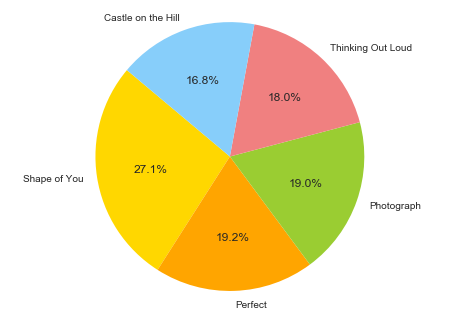

In [10]:
sheeran = data.loc[data['Artist'] == 'Ed Sheeran',:]
colors = ['gold', 'orange','yellowgreen', 'lightcoral', 'lightskyblue']
top = sheeran['Track Name'].value_counts()[:5].index.tolist()
value =sheeran['Track Name'].value_counts()[:5].values.tolist()
plt.pie(value, labels=top, colors=colors, autopct='%1.1f%%',startangle=140)
plt.axis('equal')
plt.show()

<b> For the all songs as the position increases number of streams decreases
i.e we can say that the #1 song has the most streams

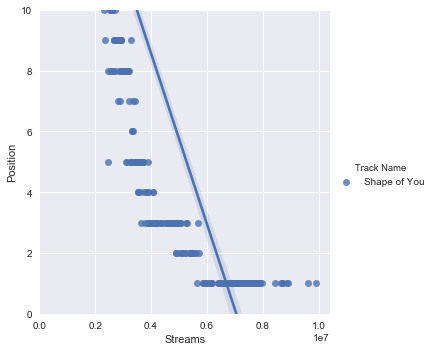

In [11]:
songs = sheeran[(sheeran['Region'] == 'global') & (sheeran['Track Name'] == 'Shape of You') ]
songs['Position'].value_counts()
songs['Streams'].value_counts()
sns.lmplot(x='Streams', y='Position', data=songs,hue='Track Name')
plt.ylim(0, 10)
plt.xlim(0, None)
plt.show()

<b> Violin plot helps us realise the variance in position of the top 5 songs

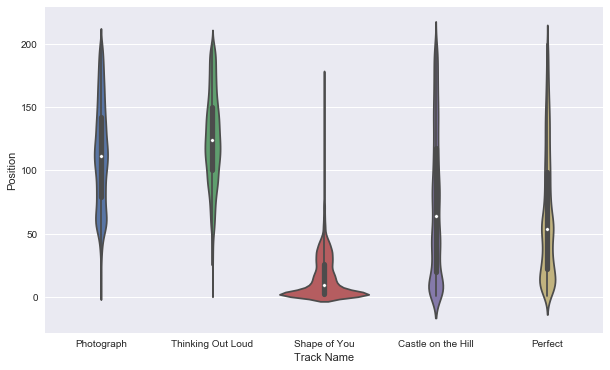

In [15]:
plt.figure(figsize=(10,6))
songs = sheeran[(sheeran['Track Name'] == 'Perfect') | (sheeran['Track Name'] == 'Shape of You') |  (sheeran['Track Name'] == 'Photograph') |  (sheeran['Track Name'] == 'Thinking Out Loud') | (sheeran['Track Name'] == 'Castle on the Hill') ]
sns.violinplot(x='Track Name', y='Position', data=songs)
plt.show()

<b> Shape of you is consistent in #1 while Perfect mostly ranks within the top 50


<b> Position and stream have an almost negative correlation (Low stream means lower position)

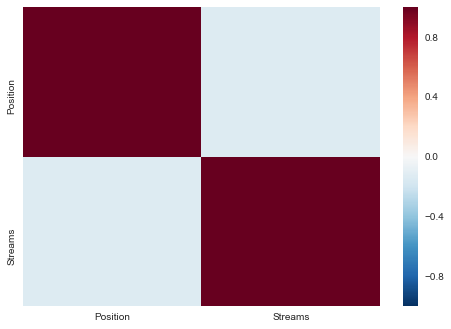

In [27]:
cor = data.drop('URL',axis =1)
cor = cor.drop('Date',axis=1)
# Calculate correlations
corr = cor.corr()
# Heatmap
sns.heatmap(corr)
plt.show()

In [40]:
from datetime import datetime
data["Date2"]=data["Date"].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

<b> Let us see the ranking with respect to time for Camilla Cabello's hit single Havana (I like the song xd)

<img src = 'Havana.jpg'>

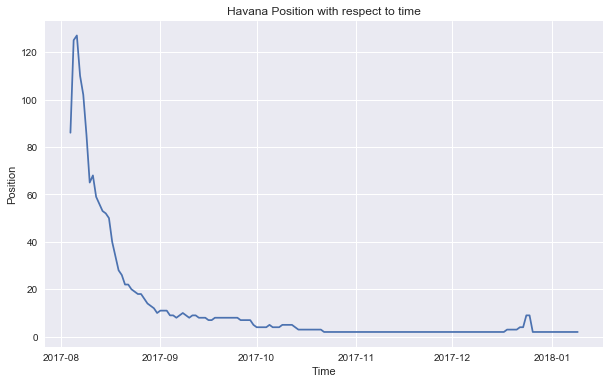

In [54]:
plt.figure(figsize=(10,6))
poss = data[(data['Region'] == 'global') & (data['Track Name'] == 'Havana') ]
plt.plot(poss['Date2'],poss['Position'])
plt.title('Havana Position with respect to time')
plt.xlabel('Time')
plt.ylabel('Position')
plt.show()

<b> As the time increases, the ranking also increases, Havana reached its top position in the start of 2018...YAY Camilla !!


<b> If we look at songs in the US, Post Malone leads with his track rockstar follwed by Kendrick's HUMBLE

<b> Americans seem to like rap more than other countries (Guess who feels likes a rockstar now)

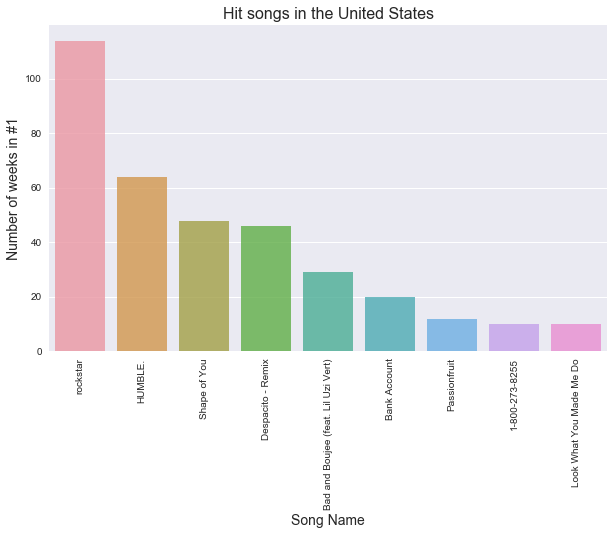

In [79]:
plt.figure(figsize=(10,6))
poss = data[(data['Region'] == 'us') & (data['Position'] == 1)]
dat = poss['Track Name'].value_counts()
Best = dat[(dat.values>8)]
sns.barplot(Best.index, Best.values, alpha=0.8)
plt.xticks(rotation='vertical')
plt.xlabel('Song Name', fontsize=14)
plt.ylabel('Number of weeks in #1', fontsize=14)
plt.title("Hit songs in the United States", fontsize=16)
plt.show()

<h2>If this were a recommender system and you are from the US, I would suggest you listen to Rockstar, HUMBLE, Shape of You, Despacito-Remix, Bank Account and Passionfruit